In [78]:
import xarray as xr
import pyresample
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
src_dir = os.environ.get('srcdir')
print(src_dir)

sys.path.append(src_dir)

# always reload modules marked with "%aimport"
%load_ext autoreload
%autoreload 1

from features.resample import resample
%aimport features.resample

/home/ubuntu/bigStick/tidal_melting/src
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
tpxo_grid_path = os.path.join(os.environ.get('extdir'),'tpxo','grid_tpxo7.2.nc')
tpxo_grid = xr.open_dataset(tpxo_grid_path)
waom_path = his_path = os.path.join(os.environ.get('rawdir'),'gdata','waom10_data','waom10_grd.nc')
waom = xr.open_dataset(waom_path)

In [80]:
values = tpxo_grid.hz.values
lat_s = tpxo_grid.lat_z.values
lon_s = tpxo_grid.lon_z.values
lon_s[lon_s > 180] -= 360.0
print(lon_s.min(),lon_s.max())
tpxo_wct = resample(lon_s,lat_s,waom.lon_rho.values,waom.lat_rho.values,values)
tpxo_mask = np.asarray(resample(lon_s,lat_s,waom.lon_rho.values,waom.lat_rho.values,tpxo_grid.mz.values))

-179.75 180.0


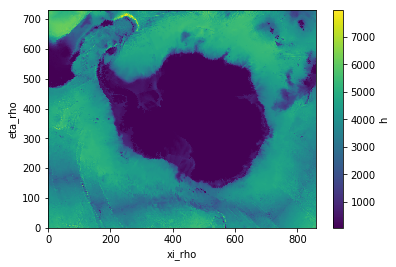

False
<xarray.DataArray 'h' ()>
array(50.0) <xarray.DataArray 'h' ()>
array(7962.75)


In [81]:
tpxo_wct[tpxo_wct<50]=50.0
waom.h.values=tpxo_wct.copy()
plt.close()
waom.h.plot()
plt.show()
print((waom.h != tpxo_wct).any().values)
print(waom.h.min(),waom.h.max())

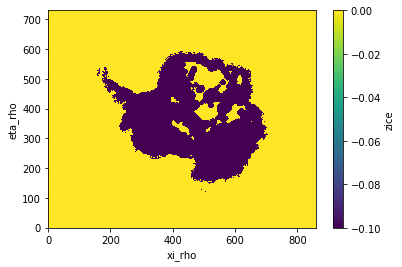

<xarray.DataArray 'zice' ()>
array(0.0) <xarray.DataArray 'zice' ()>
array(-0.1)


In [82]:
waom.zice.values = waom.zice.where(waom.zice == 0.0,-0.1)
plt.close()
waom.zice.plot()
plt.show()
print(waom.zice.max(),waom.zice.min())

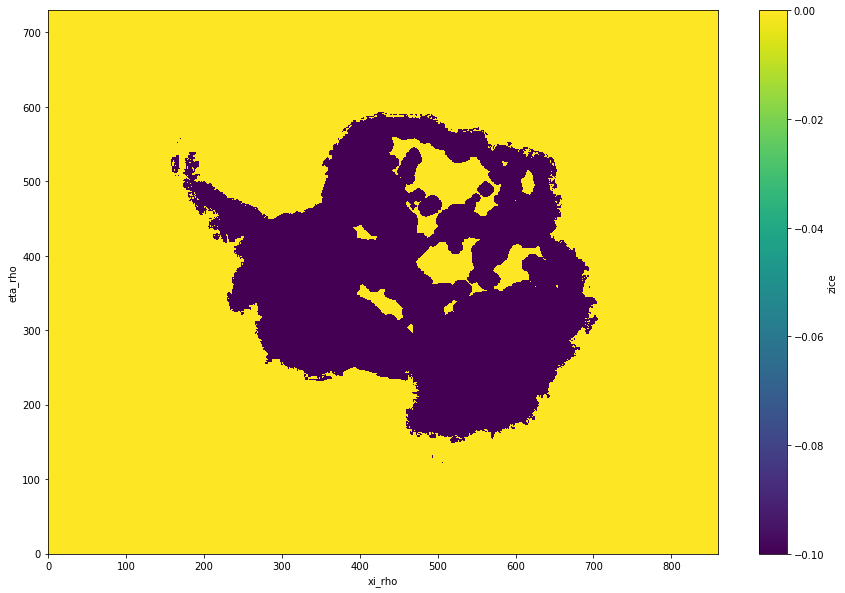

In [91]:
waom.zice[583:693,145:311] = 0.0
plt.close()
waom.zice.plot(size=10)
plt.show()

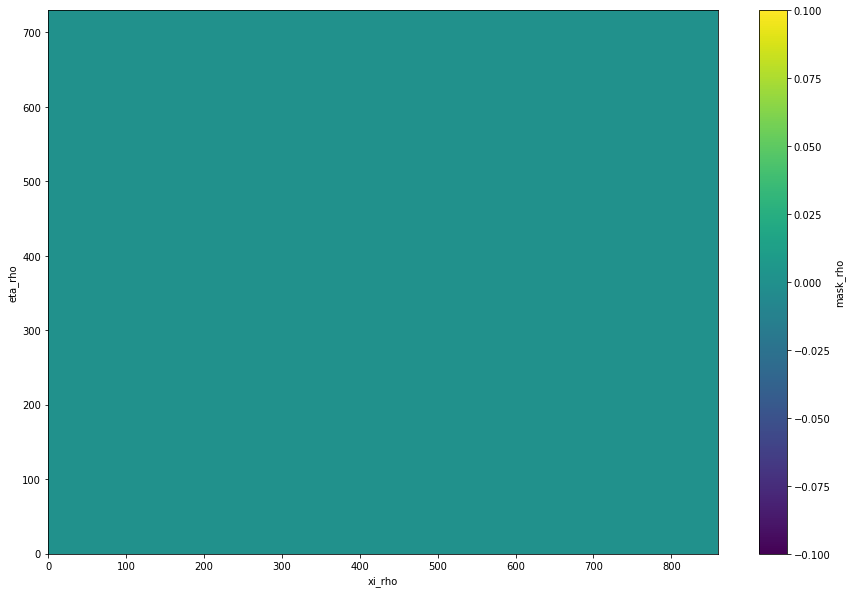

array(False, dtype=bool)

In [96]:
mask_new = waom.mask_rho.where(np.isnan(tpxo_mask),0)
waom.mask_rho.values = mask_new
waom.mask_rho[593:605,190:197]=0
plt.close()
(waom.mask_rho-mask_new).plot(size=10)
plt.show()
(waom.mask_rho!=mask_new).any().values

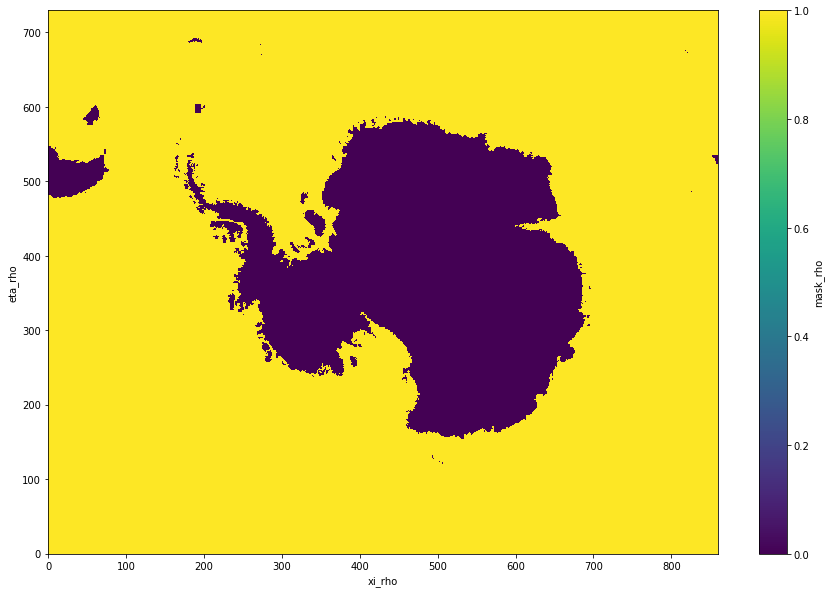

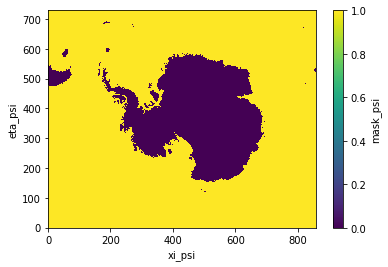

In [97]:
from features.uvp_masks import uvp_masks
waom.mask_u.values,waom.mask_v.values,waom.mask_psi.values = uvp_masks(waom.mask_rho.values)
plt.close()
waom.mask_rho.plot(size=10)
plt.show()
waom.mask_psi.plot()
plt.show()

In [98]:
out_file = os.path.join(waom_path,os.pardir,'waom10_grd_tpxo.nc')
waom[['h','zice','mask_rho','mask_u','mask_v','mask_psi']].to_netcdf(out_file,'a')

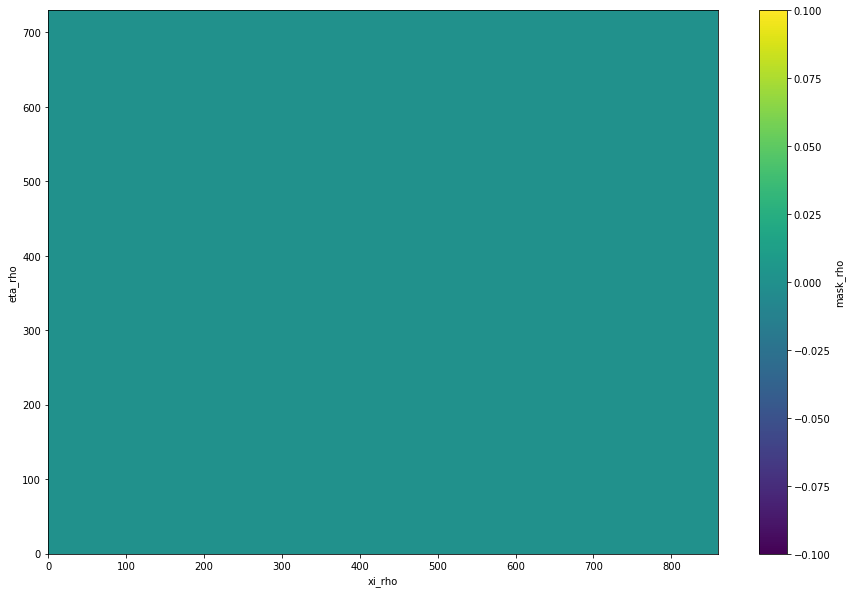

In [77]:
waom_new = xr.open_dataset(outfile)
plt.close()
(waom.mask_rho-tpxo_mask).fillna(0).plot(size=10)
plt.show()

In [44]:
for var in ['h','zice','mask_rho','mask_u','mask_v','mask_psi']:
    print(waom[var].isnull().any().values)

False
False
False
False
False
False


In [45]:
waom_new.h.min()

<xarray.DataArray 'h' ()>
array(-0.0)